<a href="https://colab.research.google.com/github/Rosangelafl/Eleicoes_Brasil/blob/master/bem_candidato2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv


In [ ]:
arquivo = open('/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv', encoding='latin-1')
leitor = csv.reader(arquivo)
print(next(leitor))

['DT_GERACAO;"HH_GERACAO";"ANO_ELEICAO";"CD_TIPO_ELEICAO";"NM_TIPO_ELEICAO";"CD_ELEICAO";"DS_ELEICAO";"DT_ELEICAO";"SG_UF";"SG_UE";"NM_UE";"SQ_CANDIDATO";"NR_ORDEM_CANDIDATO";"CD_TIPO_BEM_CANDIDATO";"DS_TIPO_BEM_CANDIDATO";"DS_BEM_CANDIDATO";"VR_BEM_CANDIDATO";"DT_ULTIMA_ATUALIZACAO";"HH_ULTIMA_ATUALIZACAO"']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
arquivo = '/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv'
df = pd.read_csv(arquivo, encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', 
                 quotechar='"')
df.head().T

,0,1,2,3,4
DT_GERACAO,17/10/2020,17/10/2020,17/10/2020,17/10/2020,17/10/2020
HH_GERACAO,17:08:19,17:08:19,17:08:19,17:08:19,17:08:19
ANO_ELEICAO,2020,2020,2020,2020,2020
CD_TIPO_ELEICAO,2,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
CD_ELEICAO,426,426,426,426,426
DS_ELEICAO,Eleições Municipais 2020,Eleições Municipais 2020,Eleições Municipais 2020,Eleições Municipais 2020,Eleições Municipais 2020
DT_ELEICAO,15/11/2020,15/11/2020,15/11/2020,15/11/2020,15/11/2020
SG_UF,GO,PR,CE,BA,RS
SG_UE,96059,74446,15873,35696,85413


In [ ]:
df['DT_GERACAO'].describe()

count        1007451
unique             1
top       17/10/2020
freq         1007451
Name: DT_GERACAO, dtype: object

In [ ]:
bens_cand = pd.read_csv('/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, decimal=',',
                        sep=';', quotechar='"', usecols=['SG_UF', 'SG_UE','NM_UE','SQ_CANDIDATO','DS_TIPO_BEM_CANDIDATO',
                                                         'DS_BEM_CANDIDATO','VR_BEM_CANDIDATO'])

In [ ]:
bens_cand.head().T

,0,1,2,3,4
SG_UF,GO,PR,CE,BA,RS
SG_UE,96059,74446,15873,35696,85413
NM_UE,SÃO SIMÃO,ITAPERUÇU,AMONTADA,IGAPORÃ,BENTO GONÇALVES
SQ_CANDIDATO,90000791563,160000996056,60000979523,50000792280,210000783855
DS_TIPO_BEM_CANDIDATO,Terreno,Terreno,Depósito bancário em conta corrente no País,Terreno,Terreno
DS_BEM_CANDIDATO,UM LOTE DE TERRENO LOCALIZADO AV MINAS GERAIS ...,LOCALIZADO NA RUA ANTONIO SIQUEIRA VIDAL,BANCO DO BRASIL,"2,5 HECTARES FAZENDA CAPÃO",TERRENO
VR_BEM_CANDIDATO,5000,700000,3000,30000,550000


In [ ]:
bens_cand.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in bens_cand.columns] 

In [ ]:
bens_cand.SQ_CANDIDATO = bens_cand.SQ_CANDIDATO.astype('category')

In [ ]:
bens_cand.CODIGO_TSE = bens_cand.CODIGO_TSE.astype('category')

In [ ]:
bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007451 entries, 0 to 1007450
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   SG_UF                  1007451 non-null  object  
 1   CODIGO_TSE             1007451 non-null  category
 2   NM_UE                  1007451 non-null  object  
 3   SQ_CANDIDATO           1007451 non-null  category
 4   DS_TIPO_BEM_CANDIDATO  1007451 non-null  object  
 5   DS_BEM_CANDIDATO       1007451 non-null  object  
 6   VR_BEM_CANDIDATO       1007451 non-null  float64 
dtypes: category(2), float64(1), object(4)
memory usage: 57.0+ MB


In [ ]:
#João Carlos Ribeiro, o candidato mais rico do país
joao= bens_cand[bens_cand['SQ_CANDIDATO'] == 160001000870]

In [ ]:
joao

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
47943,PR,75523,PONTAL DO PARANÁ,160001000870,OUTROS BENS E DIREITOS,"Direitos sobre area de 390.967,50m2 em Pontal ...",6.500000e+05
49618,PR,75523,PONTAL DO PARANÁ,160001000870,"Aplicação de renda fixa (CDB, RDB e outros)",4.000 açoes CEMIG,5.504000e+04
60026,PR,75523,PONTAL DO PARANÁ,160001000870,Ações (inclusive as provenientes de linha tele...,1.000 açoes SABESP,6.088000e+04
60974,PR,75523,PONTAL DO PARANÁ,160001000870,Ações (inclusive as provenientes de linha tele...,19.179.982 açoes JCR Administração e Participa...,3.059712e+08
61036,PR,75523,PONTAL DO PARANÁ,160001000870,Depósito bancário em conta corrente no País,Saldo conta corrente Caixa Economica Federal,1.080981e+04
102208,PR,75523,PONTAL DO PARANÁ,160001000870,Outros bens imóveis,Lote B-1 atribuido a proporcionalidade 30% des...,2.005063e+05
107172,PR,75523,PONTAL DO PARANÁ,160001000870,Ações (inclusive as provenientes de linha tele...,1.500 açoes Carrefour,3.507000e+04
109300,PR,75523,PONTAL DO PARANÁ,160001000870,Depósito bancário em conta corrente no País,Saldo conta corrente Credit Suisse,1.457180e+07
154400,PR,75523,PONTAL DO PARANÁ,160001000870,Ações (inclusive as provenientes de linha tele...,1.000 açoes Banrisul,2.166000e+04
191484,PR,75523,PONTAL DO PARANÁ,160001000870,Quotas ou quinhões de capital,"0,01% açoes empresa FR Energia",1.000000e+00


In [ ]:
joao['VR_BEM_CANDIDATO'].sum()

1553325556.2199998

In [ ]:
joao['VR_BEM_CANDIDATO'].max()

1115286085.65

In [ ]:
joao[joao['VR_BEM_CANDIDATO'] == 1115286085.65]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
330979,PR,75523,PONTAL DO PARANÁ,160001000870,Fundo de Longo Prazo e Fundo de Investimentos ...,Fundos de Investimento - BTG Pactual,1.115286e+09


In [ ]:
bens_cand.VR_BEM_CANDIDATO.describe()

count    1.007451e+06
mean     1.149361e+05
std      6.115006e+06
min     -1.131400e+02
25%      7.000000e+03
50%      2.500000e+04
75%      8.000000e+04
max      4.910551e+09
Name: VR_BEM_CANDIDATO, dtype: float64

In [ ]:
bens_cand['VR_BEM_CANDIDATO'].max()

4910551240.0

In [ ]:
bens_cand[bens_cand['VR_BEM_CANDIDATO']== 4910551240.0]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
39680,RJ,58017,ANGRA DOS REIS,190001019131,Prédio comercial,PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ,4.910551e+09


In [ ]:
bens_cand.loc[bens_cand.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].idxmax()]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
393560,AC,1570,ASSIS BRASIL,10000641345,Terra nua,LOTE DE TERRA 15 HECTARES,180000.0
630419,AC,1570,ASSIS BRASIL,10000641349,Outros bens imóveis,CASA MISTA MADEIRA E ALVENARIA,160000.0
536201,AC,1570,ASSIS BRASIL,10000641351,Embarcação,CANOA DE MADEIRA 9M COM MOTOR,7000.0
551442,AC,1570,ASSIS BRASIL,10000641352,Outros bens imóveis,CASA MISTA MADEIRA E ALVENARIA,150000.0
52253,AC,1570,ASSIS BRASIL,10000641353,Terra nua,LOTE DE TERRA - 100 HECTARES,150000.0
...,...,...,...,...,...,...,...
790253,TO,96997,BARROLÂNDIA,270001267882,Outros bens imóveis,"CHACARA RECANTO FELIZ, MUNICIPIO DE BARROLANDIA",110000.0
235579,TO,73440,PALMAS,270001267915,"Veículo automotor terrestre: caminhão, automóv...",camionete S10,20000.0
140307,TO,73601,LAVANDEIRA,270001267986,"Veículo automotor terrestre: caminhão, automóv...",FIAT SIENA ELX - ANO/MOD 2004/2005,12000.0
114126,TO,95290,COLMÉIA,270001268005,Terreno,UM LOTE URBANO LOT. LAGUNA EM PORTO NACIONAL - TO,40000.0


In [ ]:
bens_cand[(bens_cand['VR_BEM_CANDIDATO'] > 500000.00) & (bens_cand['VR_BEM_CANDIDATO'] < 1000000.00)]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
1,PR,74446,ITAPERUÇU,160000996056,Terreno,LOCALIZADO NA RUA ANTONIO SIQUEIRA VIDAL,700000.00
4,RS,85413,BENTO GONÇALVES,210000783855,Terreno,TERRENO,550000.00
87,PA,5754,URUARÁ,140000802574,Outros bens imóveis,IMOVEL RURAL CONSTITUIDO PELO LOTES NO18 E 19 ...,800000.00
88,MT,90425,COTRIGUAÇU,110001257365,Outros bens imóveis,SITIO RURAL DE 100 HECTARES COM MATRICULA 5.010,780000.00
118,SP,72257,VALINHOS,250000982072,Outros bens imóveis,IMÓVEL COMERCIAL NA RUA GERVÁSIO JOSE MARCHIOR...,700000.00
...,...,...,...,...,...,...,...
1001334,PA,4278,BELÉM,140000935771,Caderneta de poupança,conta poupança Banpará,529016.01
1002240,RJ,58017,ANGRA DOS REIS,190000976927,Crédito decorrente de empréstimo,SALDO A RECEBER DE LUIZ ANTÔNIO CECILIANO JORD...,552334.00
1004381,PR,75345,FERNANDES PINHEIRO,160000796828,Crédito decorrente de empréstimo,CREDITO DECORRENTE DE EMPRESTIMO EFETUADO A EM...,752803.25
1005346,MG,43052,CATAGUASES,130000675879,Crédito decorrente de empréstimo,EMPRESTIMO CARLA DE SOUZA LAGE,805000.00


In [ ]:
bens_cand['DS_TIPO_BEM_CANDIDATO'].value_counts()

Veículo automotor terrestre: caminhão, automóvel, moto, etc.                                                        328733
Casa                                                                                                                157823
Terreno                                                                                                             111477
Depósito bancário em conta corrente no País                                                                          59675
Dinheiro em espécie - moeda nacional                                                                                 53681
Outros bens imóveis                                                                                                  39384
Caderneta de poupança                                                                                                35388
Quotas ou quinhões de capital                                                                                        32610
Apartamento     

In [ ]:
bens_cand[bens_cand['DS_TIPO_BEM_CANDIDATO'] == 'Jóia, quadro, objeto de arte, de coleção, antiguidade, etc.']

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
2470,RJ,58653,NITERÓI,190000886840,"Jóia, quadro, objeto de arte, de coleção, anti...",joias e obras de artes,25000.0
2474,RJ,58696,NOVA IGUAÇU,190001113421,"Jóia, quadro, objeto de arte, de coleção, anti...",Jóias diversas,7550.0
5738,GO,92975,CAMPOS BELOS,90000942932,"Jóia, quadro, objeto de arte, de coleção, anti...",joias,200000.0
5881,RJ,58793,PIRAÍ,190000988640,"Jóia, quadro, objeto de arte, de coleção, anti...",JOIAS DIVERSAS,40000.0
5984,SP,64777,GUARULHOS,250001156020,"Jóia, quadro, objeto de arte, de coleção, anti...",Jóias em poder do delarante havidas por herança,15000.0
...,...,...,...,...,...,...,...
933638,SP,66710,MAIRIPORÃ,250001263136,"Jóia, quadro, objeto de arte, de coleção, anti...",Anel de bacharel em Direito: prata com pedras ...,700.0
933692,PR,75353,CURITIBA,160000657203,"Jóia, quadro, objeto de arte, de coleção, anti...",UM QUADRO ESCOLA CUSQUENHA ANTIGO ADQUIRIDO EM...,10500.0
933957,SP,71072,SÃO PAULO,250001088409,"Jóia, quadro, objeto de arte, de coleção, anti...",BENS MOVEIS - JOAIS - ARTES E UTENSILIOS,300000.0
934655,RJ,58777,PETRÓPOLIS,190000649012,"Jóia, quadro, objeto de arte, de coleção, anti...",Joias pessoais,13500.0


In [ ]:
bens_cand[bens_cand['DS_TIPO_BEM_CANDIDATO'] == 'Jóia, quadro, objeto de arte, de coleção, antiguidade, etc.'].value_counts(ascending=False)

SG_UF  CODIGO_TSE  NM_UE                   SQ_CANDIDATO  DS_TIPO_BEM_CANDIDATO                                        DS_BEM_CANDIDATO                                                                                                                                                                                          VR_BEM_CANDIDATO
TO     93858       GURUPI                  270001168307  Jóia, quadro, objeto de arte, de coleção, antiguidade, etc.  05 ANEIS, 03 CORRENTES, 04 PULSEIRAS, 05 PARES DE BRINCOS,                                                                                                                                                10000.0             1
PE     25313       RECIFE                  170000839506  Jóia, quadro, objeto de arte, de coleção, antiguidade, etc.  JOIAS / QUADROS / ESCULTURAS                                                                                                                                                                              5

In [ ]:
bens_cand['VR_BEM_CANDIDATO'].max()

4910551240.0

In [ ]:
bens_cand[bens_cand['VR_BEM_CANDIDATO'] == 4910551240.0]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
39680,RJ,58017,ANGRA DOS REIS,190001019131,Prédio comercial,PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ,4.910551e+09


In [ ]:
bens_cand[bens_cand['DS_TIPO_BEM_CANDIDATO'] == 'Aeronave']

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
26200,MG,48615,MONTE CARMELO,130000986720,Aeronave,Um avião experimental VIMANA R12 em construção,132000.0
27161,PA,4839,MARABÁ,140000762303,Aeronave,"UMA CASA NA TRAVSESSA SOLDOESTE, QUADRA 111, L...",200000.0
30251,SC,81175,GASPAR,240000645707,Aeronave,"Casa de alvenaria com 120m², na Rua Bonifacio ...",350000.0
61554,MS,90794,GLÓRIA DE DOURADOS,120000749146,Aeronave,"Prefixo PU-PJL, modelo conquest 180 LSA, ano 2...",184000.0
61912,GO,92851,CAÇU,90000856110,Aeronave,NEIVA/ MODELO EMBRAER 711 ST/ CORISCO TURBO PR...,350000.0
...,...,...,...,...,...,...,...
972619,MT,90352,BARRA DO GARÇAS,110000756882,Aeronave,"UM AVIÃO SÊNECA V,ANO 2002",1300000.0
976003,SP,64394,GENERAL SALGADO,250000954365,Aeronave,Um imóvel residencial localizado na Rua Manoel...,170000.0
976676,PR,74357,ARAUCÁRIA,160000793898,Aeronave,"UM HELICÓPTERO MONOMOTOR, TURBOEIXO, MARCA BEL...",3474000.0
976824,GO,96474,MINAÇU,90000912301,Aeronave,50% DA PARTE SOCIETARIA DE UMA AERONAVA MARCA ...,350000.0


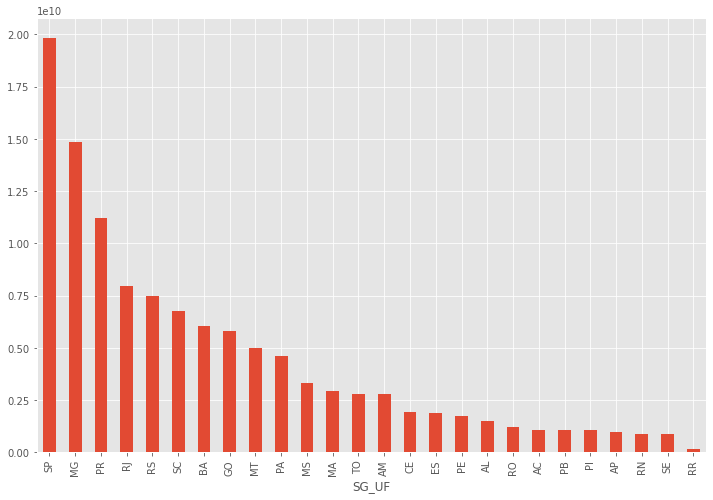

In [ ]:
bens_cand.groupby('SG_UF')['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
mineracao = bens_cand[bens_cand['DS_TIPO_BEM_CANDIDATO'] == 'Direito de lavra e assemelhado']

In [ ]:
mineracao

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
35879,PR,79693,PÉROLA,160000866792,Direito de lavra e assemelhado,"DIREITO AO IMÓVEL, (CONFORME INSTRUMENTO DE CE...",20000.00
76018,SP,61581,ALAMBARI,250001063914,Direito de lavra e assemelhado,DIREITO SOBRE O PRÉDIO RESIDENCIAL RUA MAJOR C...,15000.00
82261,MG,52736,SÃO LOURENÇO,130000657634,Direito de lavra e assemelhado,PROCESSO 830902/2015 REGISTRADO JUNTO AO DNPM ...,14000.00
127070,SP,66036,JARDINÓPOLIS,250000753878,Direito de lavra e assemelhado,DIREITOS S/ UM IMOVEL URBANO DENOMINADO CHACAR...,100000.00
127425,PR,77879,PRESIDENTE CASTELO BRANCO,160001182225,Direito de lavra e assemelhado,direito de linha telefonica na cidade de Presi...,3469.85
178873,TO,73300,CARIRI DO TOCANTINS,270001073185,Direito de lavra e assemelhado,"CHACARA SITUADO NA FAZENDA COIMBRA, PA COIMBRA...",200000.00
186512,PR,77771,PONTA GROSSA,160001107762,Direito de lavra e assemelhado,pinus,18000.00
187274,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 833511/2008 CAR...,2200000.00
219405,GO,92061,CAMPOS VERDES,90000679154,Direito de lavra e assemelhado,50 % da area de mineração ouro Hidrolina,100000.00
230517,MG,40223,FRANCISCÓPOLIS,130000946069,Direito de lavra e assemelhado,POSSUI DIREITO DE PESQUISA E EXPLORACAO MINERA...,50000.00


In [ ]:
mineracao[mineracao['SQ_CANDIDATO'] == 130000644544]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
187274,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 833511/2008 CAR...,2200000.0
234438,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 830336/2001 RES...,15000000.0
282518,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA DE QUARTZO REGISTRO DNPM 830041/2012 ...,2200000.0
282519,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA MARMORE REGISTRO DNPM 830504/2004 MAR...,6600000.0
455377,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA AREIA/QUARTZO REGISTRO DNPM 832302/20...,4400000.0
534607,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 833305/2003 BICAS,660000.0
612640,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA MARMORE REGISTRO DNPM 831221/2004 SAN...,2200000.0
691809,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 830927/1980 BICAS,5500000.0
848288,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 830203/2001 BAR...,2200000.0
848289,MG,41378,BICAS,130000644544,Direito de lavra e assemelhado,PEDREIRA QUARTZO REGISTRO DNPM 832432/2011 BICAS,1100000.0


In [ ]:
bicas = mineracao[mineracao['SQ_CANDIDATO'] == 130000644544]

In [ ]:
bicas['VR_BEM_CANDIDATO'].sum()

48660000.0

In [ ]:
mineracao[mineracao['SQ_CANDIDATO'] == 90000679154]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
219405,GO,92061,CAMPOS VERDES,90000679154,Direito de lavra e assemelhado,50 % da area de mineração ouro Hidrolina,100000.0
979671,GO,92061,CAMPOS VERDES,90000679154,Direito de lavra e assemelhado,50 carinho de xisto mineralisado,10000.0
983072,GO,92061,CAMPOS VERDES,90000679154,Direito de lavra e assemelhado,cessão 40% lavra garimpeira esmeralda,300000.0
